In [1]:
import os

import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt

In [2]:
folderpath_1 = "C:\\Users\\Sebastiano Gadolini\\Documents\\Python Scripts\\VacuumTing_ProcessData\\" #Needs_Strain_Processising\\
filekeyword = '.txt'

# Initialize an empty list to store DataFrames
dataframes_1 = []

# Iterate through all files in the directory
for fname in os.listdir(folderpath_1):
    if filekeyword in fname:
        FILE_PATH = os.path.join(folderpath_1, fname)
        
        # Read the file into a DataFrame
        df = pd.read_csv(
            FILE_PATH,
            header=None,
            engine="python",
            skiprows=6,
            sep=r" - |,",
            # error_bad_lines=False  # Uncomment this line if you want to skip corrupted lines 
        )

        df['filename'] = fname
        
        # Append the DataFrame to the list
        dataframes_1.append(df)

# Combine all DataFrames into a single DataFrame
combined_df_1 = pd.concat(dataframes_1, ignore_index=True)

In [3]:
combined_df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,filename
0,2024-06-27 16:00:40.599909,0x0F,0x0F,0.000000,25.26,11.89,10.63,24.71,31.20,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
1,2024-06-27 16:00:40.702654,0x0F,0x0F,0.003750,25.34,11.89,10.59,24.74,25.08,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
2,2024-06-27 16:00:40.805434,0x0F,0x0F,0.004219,25.39,11.94,10.59,24.75,29.49,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
3,2024-06-27 16:00:40.908245,0x0F,0x0F,0.000937,25.34,11.97,10.66,24.71,30.40,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
4,2024-06-27 16:00:41.010530,-0.000387675239836512,0.0005696849721786686,0.002344,25.41,11.89,10.63,24.73,30.82,0.0,...,0.0006829756357990981,0.00013799612651364113,0.00010956250179579118,0.00048787428491621054,0.00012441186186716796,-0.0010525097906942122,-0.0012050954128416907,-0.00108158005304133,-0.0011122002589276227,20240627160039_RRC2.txt


In [4]:
combined_df_1.columns = [
    "timestamp",
    "strain1",
    "strain2",
    "h2_flow_rate",
    "temp1",
    "temp2",
    "temp3",
    "temp4",
    "pressure",
    "H2_transferred_cumulative",
    "strain3",
    "strain4",
    "SR3 strain 1",
    "SR3 strain 2",
    "SR3 strain 3",
    "SR3 strain 4",
    "SR4 strain 1",
    "SR4 strain 2",
    "SR4 strain 3",
    "SR4 strain 4",
    "filename"
]

In [5]:
combined_df_1["strain1"], combined_df_1["strain2"], combined_df_1["strain3"], combined_df_1["strain4"] = combined_df_1["SR3 strain 1"], combined_df_1["SR3 strain 2"], combined_df_1["SR3 strain 3"], combined_df_1["SR3 strain 4"]

In [6]:
combined_df_1.head(20)

,timestamp,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,H2_transferred_cumulative,...,strain4,SR3 strain 1,SR3 strain 2,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename
0,2024-06-27 16:00:40.599909,0x0F,0x0F,0.000000,25.26,11.89,10.63,24.71,31.20,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
1,2024-06-27 16:00:40.702654,0x0F,0x0F,0.003750,25.34,11.89,10.59,24.74,25.08,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
2,2024-06-27 16:00:40.805434,0x0F,0x0F,0.004219,25.39,11.94,10.59,24.75,29.49,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
3,2024-06-27 16:00:40.908245,0x0F,0x0F,0.000937,25.34,11.97,10.66,24.71,30.40,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
4,2024-06-27 16:00:41.010530,0.00013799612651364113,0.00010956250179579118,0.002344,25.41,11.89,10.63,24.73,30.82,0.0,...,0.00012441186186716796,0.00013799612651364113,0.00010956250179579118,0.00048787428491621054,0.00012441186186716796,-0.0010525097906942122,-0.0012050954128416907,-0.00108158005304133,-0.0011122002589276227,20240627160039_RRC2.txt
5,2024-06-27 16:00:41.113106,0x0F,0x0F,0.001875,25.43,11.87,10.59,24.71,31.13,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
6,2024-06-27 16:00:41.234050,0x0F,0x0F,0.000000,25.45,11.85,10.61,24.71,31.28,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
7,2024-06-27 16:00:41.745417,0x0F,0x0F,0.000000,25.37,11.91,10.59,24.81,31.36,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
8,2024-06-27 16:00:42.257351,0x0F,0x0F,0.000937,25.37,11.94,10.65,24.69,31.08,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
9,2024-06-27 16:00:42.785029,0x0F,0x0F,0.000000,25.35,11.91,10.61,24.73,30.89,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt


In [7]:
folderpath_2 = "C:\\Users\\Sebastiano Gadolini\\Documents\\Python Scripts\\VacuumTing_ProcessData\\SR4_THS-103_Activation\\"
filekeyword = '.txt'

# Initialize an empty list to store DataFrames
dataframes_2 = []

# Iterate through all files in the directory
for fname in os.listdir(folderpath_2):
    if filekeyword in fname:
        FILE_PATH = os.path.join(folderpath_2, fname)
        
        # Read the file into a DataFrame
        df = pd.read_csv(
            FILE_PATH,
            header=None,
            engine="python",
            skiprows=6,
            sep=r" - |,",
            # error_bad_lines=False  # Uncomment this line if you want to skip corrupted lines 
        )

        df['filename'] = fname
        
        # Append the DataFrame to the list
        dataframes_2.append(df)

# Combine all DataFrames into a single DataFrame
combined_df_2 = pd.concat(dataframes_2, ignore_index=True)

In [8]:
combined_df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,filename,16,17,18,19
0,2024-03-07 16:50:16.325569,0x0F,0x0F,0.000,23.56,23.54,24.89,24.27,-0.03,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,20240307165015_RRC2-AllLogs.txt,NaN,NaN,NaN,NaN
1,2024-03-07 16:50:16.449458,0x0F,0x0F,0.000,23.55,23.61,24.85,24.16,-0.03,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,20240307165015_RRC2-AllLogs.txt,NaN,NaN,NaN,NaN
2,2024-03-07 16:50:16.960716,0x0F,0x0F,0.000,23.56,23.55,24.89,24.22,-0.04,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,20240307165015_RRC2-AllLogs.txt,NaN,NaN,NaN,NaN
3,2024-03-07 16:50:17.472357,0x0F,0x0F,0.000,23.59,23.61,24.84,24.20,-0.02,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,20240307165015_RRC2-AllLogs.txt,NaN,NaN,NaN,NaN
4,2024-03-07 16:50:17.984422,0x0F,0x0F,0.105,23.59,23.61,24.91,24.18,-0.04,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,20240307165015_RRC2-AllLogs.txt,NaN,NaN,NaN,NaN


In [9]:
combined_df_2.columns = [
    "timestamp",
    "strain1",
    "strain2",
    "h2_flow_rate",
    "temp1",
    "temp2",
    "temp3",
    "temp4",
    "pressure",
    "H2_transferred_cumulative",
    "strain3",
    "strain4",
    "SR3 strain 1",
    "SR3 strain 2",
    "SR3 strain 3",
    "SR3 strain 4",
    "SR4 strain 1",
    "SR4 strain 2",
    "SR4 strain 3",
    "SR4 strain 4",
    "filename"
]

In [10]:
combined_df_2["filename"] = combined_df_2["SR4 strain 1"]

In [11]:
combined_df_2.head()

,timestamp,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,H2_transferred_cumulative,...,strain4,SR3 strain 1,SR3 strain 2,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename
0,2024-03-07 16:50:16.325569,0x0F,0x0F,0.000,23.56,23.54,24.89,24.27,-0.03,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,20240307165015_RRC2-AllLogs.txt,NaN,NaN,NaN,20240307165015_RRC2-AllLogs.txt
1,2024-03-07 16:50:16.449458,0x0F,0x0F,0.000,23.55,23.61,24.85,24.16,-0.03,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,20240307165015_RRC2-AllLogs.txt,NaN,NaN,NaN,20240307165015_RRC2-AllLogs.txt
2,2024-03-07 16:50:16.960716,0x0F,0x0F,0.000,23.56,23.55,24.89,24.22,-0.04,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,20240307165015_RRC2-AllLogs.txt,NaN,NaN,NaN,20240307165015_RRC2-AllLogs.txt
3,2024-03-07 16:50:17.472357,0x0F,0x0F,0.000,23.59,23.61,24.84,24.20,-0.02,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,20240307165015_RRC2-AllLogs.txt,NaN,NaN,NaN,20240307165015_RRC2-AllLogs.txt
4,2024-03-07 16:50:17.984422,0x0F,0x0F,0.105,23.59,23.61,24.91,24.18,-0.04,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,20240307165015_RRC2-AllLogs.txt,NaN,NaN,NaN,20240307165015_RRC2-AllLogs.txt


In [12]:
#dataframe = dataframes_1 + dataframes_2
#df = pd.concat([combined_df_2, combined_df_1], ignore_index=True)

dataframe = dataframes_1
df = combined_df_1

In [13]:
df.head()

,timestamp,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,H2_transferred_cumulative,...,strain4,SR3 strain 1,SR3 strain 2,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename
0,2024-06-27 16:00:40.599909,0x0F,0x0F,0.000000,25.26,11.89,10.63,24.71,31.20,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
1,2024-06-27 16:00:40.702654,0x0F,0x0F,0.003750,25.34,11.89,10.59,24.74,25.08,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
2,2024-06-27 16:00:40.805434,0x0F,0x0F,0.004219,25.39,11.94,10.59,24.75,29.49,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
3,2024-06-27 16:00:40.908245,0x0F,0x0F,0.000937,25.34,11.97,10.66,24.71,30.40,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
4,2024-06-27 16:00:41.010530,0.00013799612651364113,0.00010956250179579118,0.002344,25.41,11.89,10.63,24.73,30.82,0.0,...,0.00012441186186716796,0.00013799612651364113,0.00010956250179579118,0.00048787428491621054,0.00012441186186716796,-0.0010525097906942122,-0.0012050954128416907,-0.00108158005304133,-0.0011122002589276227,20240627160039_RRC2.txt


In [14]:
df.tail()

,timestamp,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,H2_transferred_cumulative,...,strain4,SR3 strain 1,SR3 strain 2,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename
121067,2024-06-28 09:16:10.067692,0x0F,0x0F,0.000000,24.07,10.41,9.84,23.70,31.34,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
121068,2024-06-28 09:16:10.578897,0x0F,0x0F,0.000000,24.09,10.41,9.77,23.73,31.24,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
121069,2024-06-28 09:16:11.106499,0x0F,0x0F,0.000000,24.13,10.48,9.79,23.78,31.17,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
121070,2024-06-28 09:16:11.618390,0x0F,0x0F,0.000469,24.11,10.46,9.80,23.72,31.30,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt
121071,2024-06-28 09:16:12.129970,0.00016052640691217282,0.00011991187691677862,0.000000,24.09,10.44,9.85,23.78,31.35,0.0,...,0.00014062273999944776,0.00016052640691217282,0.00011991187691677862,0.0005006546624415575,0.00014062273999944776,-0.0010462432711796758,-0.0012042343061902593,-0.001078053479380942,-0.0011067337012951668,20240627160039_RRC2.txt


## Data Import and Processing.

### Extract cycle number.

In [15]:
df["cycle_number"] = df["timestamp"].str.contains("Complete").cumsum() + 1
df.head()

,timestamp,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,H2_transferred_cumulative,...,SR3 strain 1,SR3 strain 2,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename,cycle_number
0,2024-06-27 16:00:40.599909,0x0F,0x0F,0.000000,25.26,11.89,10.63,24.71,31.20,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
1,2024-06-27 16:00:40.702654,0x0F,0x0F,0.003750,25.34,11.89,10.59,24.74,25.08,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
2,2024-06-27 16:00:40.805434,0x0F,0x0F,0.004219,25.39,11.94,10.59,24.75,29.49,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
3,2024-06-27 16:00:40.908245,0x0F,0x0F,0.000937,25.34,11.97,10.66,24.71,30.40,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
4,2024-06-27 16:00:41.010530,0.00013799612651364113,0.00010956250179579118,0.002344,25.41,11.89,10.63,24.73,30.82,0.0,...,0.00013799612651364113,0.00010956250179579118,0.00048787428491621054,0.00012441186186716796,-0.0010525097906942122,-0.0012050954128416907,-0.00108158005304133,-0.0011122002589276227,20240627160039_RRC2.txt,1


### Filter out cycle status rows.

In [16]:
mask = (~df["timestamp"].str.contains("Complete|Start|Log|RRC2").astype(bool))
df = df.loc[mask]
df.head()

,timestamp,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,H2_transferred_cumulative,...,SR3 strain 1,SR3 strain 2,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename,cycle_number
0,2024-06-27 16:00:40.599909,0x0F,0x0F,0.000000,25.26,11.89,10.63,24.71,31.20,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
1,2024-06-27 16:00:40.702654,0x0F,0x0F,0.003750,25.34,11.89,10.59,24.74,25.08,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
2,2024-06-27 16:00:40.805434,0x0F,0x0F,0.004219,25.39,11.94,10.59,24.75,29.49,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
3,2024-06-27 16:00:40.908245,0x0F,0x0F,0.000937,25.34,11.97,10.66,24.71,30.40,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
4,2024-06-27 16:00:41.010530,0.00013799612651364113,0.00010956250179579118,0.002344,25.41,11.89,10.63,24.73,30.82,0.0,...,0.00013799612651364113,0.00010956250179579118,0.00048787428491621054,0.00012441186186716796,-0.0010525097906942122,-0.0012050954128416907,-0.00108158005304133,-0.0011122002589276227,20240627160039_RRC2.txt,1


### Extract numerical data.

In [17]:
def extract_strain_data(df: pd.DataFrame, quantity: str) -> np.ndarray:
    def extract_number(entry):
        try:
            # Ensure the entry is a string
            entry_str = str(entry)
            # Split and search for the pattern
            match = re.search(r'-?\d*\.?\d+e?-?\d+', entry_str.split(":")[-1])
            return match.group(0) if match else np.nan
        except Exception:
            return np.nan

    # Apply the extraction function to each entry in the specified column
    result = np.array([extract_number(entry) for entry in df[quantity]]).astype(float)
    
    return result

# Extract strain data.
#for col_name in ["strain1", "strain2", "strain3", "strain4","SR3 strain 1","SR3 strain 2","SR3 strain 3","SR3 strain 4","SR4 strain 1","SR4 strain 2","SR4 strain 3", "SR4 strain 4"]:
for col_name in ["strain1", "strain2", "strain3", "strain4"]:
    df[col_name] = extract_strain_data(df=df, quantity=col_name)
    
df.head()

,timestamp,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,H2_transferred_cumulative,...,SR3 strain 1,SR3 strain 2,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename,cycle_number
0,2024-06-27 16:00:40.599909,NaN,NaN,0.000000,25.26,11.89,10.63,24.71,31.20,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
1,2024-06-27 16:00:40.702654,NaN,NaN,0.003750,25.34,11.89,10.59,24.74,25.08,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
2,2024-06-27 16:00:40.805434,NaN,NaN,0.004219,25.39,11.94,10.59,24.75,29.49,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
3,2024-06-27 16:00:40.908245,NaN,NaN,0.000937,25.34,11.97,10.66,24.71,30.40,0.0,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
4,2024-06-27 16:00:41.010530,0.000138,0.00011,0.002344,25.41,11.89,10.63,24.73,30.82,0.0,...,0.00013799612651364113,0.00010956250179579118,0.00048787428491621054,0.00012441186186716796,-0.0010525097906942122,-0.0012050954128416907,-0.00108158005304133,-0.0011122002589276227,20240627160039_RRC2.txt,1


### Cast timestamp as datetime

In [18]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.dropna(subset=["timestamp"]).set_index("timestamp")
df.head()

,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,H2_transferred_cumulative,strain3,...,SR3 strain 1,SR3 strain 2,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename,cycle_number
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-27 16:00:40.599909,NaN,NaN,0.000000,25.26,11.89,10.63,24.71,31.20,0.0,NaN,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
2024-06-27 16:00:40.702654,NaN,NaN,0.003750,25.34,11.89,10.59,24.74,25.08,0.0,NaN,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
2024-06-27 16:00:40.805434,NaN,NaN,0.004219,25.39,11.94,10.59,24.75,29.49,0.0,NaN,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
2024-06-27 16:00:40.908245,NaN,NaN,0.000937,25.34,11.97,10.66,24.71,30.40,0.0,NaN,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1
2024-06-27 16:00:41.010530,0.000138,0.00011,0.002344,25.41,11.89,10.63,24.73,30.82,0.0,0.000488,...,0.00013799612651364113,0.00010956250179579118,0.00048787428491621054,0.00012441186186716796,-0.0010525097906942122,-0.0012050954128416907,-0.00108158005304133,-0.0011122002589276227,20240627160039_RRC2.txt,1


### Create experiment_type column.

In [19]:
df["experiment_type"] = df.apply(lambda row: "D" if row["cycle_number"]%2 == 0 else "A", axis=1)
df.head()

,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,H2_transferred_cumulative,strain3,...,SR3 strain 2,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename,cycle_number,experiment_type
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-27 16:00:40.599909,NaN,NaN,0.000000,25.26,11.89,10.63,24.71,31.20,0.0,NaN,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A
2024-06-27 16:00:40.702654,NaN,NaN,0.003750,25.34,11.89,10.59,24.74,25.08,0.0,NaN,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A
2024-06-27 16:00:40.805434,NaN,NaN,0.004219,25.39,11.94,10.59,24.75,29.49,0.0,NaN,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A
2024-06-27 16:00:40.908245,NaN,NaN,0.000937,25.34,11.97,10.66,24.71,30.40,0.0,NaN,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A
2024-06-27 16:00:41.010530,0.000138,0.00011,0.002344,25.41,11.89,10.63,24.73,30.82,0.0,0.000488,...,0.00010956250179579118,0.00048787428491621054,0.00012441186186716796,-0.0010525097906942122,-0.0012050954128416907,-0.00108158005304133,-0.0011122002589276227,20240627160039_RRC2.txt,1,A


### Calculate time since start for experiment and for each cycle.

In [20]:
def calculate_time_since_start_cycle(df: pd.DataFrame) -> pd.DataFrame:
    dfs = []
    for cycle in list(df["cycle_number"].unique()):
        df_cycle = df.loc[df["cycle_number"]==cycle]
        cycle_start_time = df_cycle.index[0]
        time_since_start = np.array((df_cycle.index - cycle_start_time).total_seconds()).astype(float)
        df_cycle.insert(loc=0, column="time_since_start_cycle", value=time_since_start)
        dfs.append(df_cycle)
    return pd.concat(dfs)

df = calculate_time_since_start_cycle(df=df)

In [21]:
def calculate_time_since_start_exp(df: pd.DataFrame) -> pd.DataFrame:
    # Ensure DataFrame is sorted by index (Timestamp)
    df = df.sort_index()
    
    # Initialize variables
    cumulative_time = 0
    prev_filename = None
    time_since_start = np.zeros(len(df))

    # Iterate through the DataFrame only once
    for i in range(len(df)):
        current_time = df.index[i]
        current_filename = df['filename'].iloc[i]

        if current_filename != prev_filename:
            # Reset start time when filename changes
            start_time = current_time
            prev_filename = current_filename

        # Calculate elapsed time since start of the current file
        elapsed_time = (current_time - start_time).total_seconds()
        
        # Adjust elapsed time with cumulative time from previous files
        time_since_start[i] = elapsed_time + cumulative_time
        
        # Update cumulative time when reaching the last row of the current file
        if i == len(df) - 1 or df['filename'].iloc[i + 1] != current_filename:
            cumulative_time = time_since_start[i]

    # Insert the calculated time_since_start into the DataFrame
    df.insert(loc=0, column="time_since_start", value=time_since_start)
    df["time_since_start_hours"] = df["time_since_start"] / 3600
    
    return df
    
df = calculate_time_since_start_exp(df=df)

df.head()

,time_since_start,time_since_start_cycle,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,...,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename,cycle_number,experiment_type,time_since_start_hours
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-27 16:00:40.599909,0.000000,0.000000,NaN,NaN,0.000000,25.26,11.89,10.63,24.71,31.20,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,0.000000
2024-06-27 16:00:40.702654,0.102745,0.102745,NaN,NaN,0.003750,25.34,11.89,10.59,24.74,25.08,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,0.000029
2024-06-27 16:00:40.805434,0.205525,0.205525,NaN,NaN,0.004219,25.39,11.94,10.59,24.75,29.49,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,0.000057
2024-06-27 16:00:40.908245,0.308336,0.308336,NaN,NaN,0.000937,25.34,11.97,10.66,24.71,30.40,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,0.000086
2024-06-27 16:00:41.010530,0.410621,0.410621,0.000138,0.00011,0.002344,25.41,11.89,10.63,24.73,30.82,...,0.00048787428491621054,0.00012441186186716796,-0.0010525097906942122,-0.0012050954128416907,-0.00108158005304133,-0.0011122002589276227,20240627160039_RRC2.txt,1,A,0.000114


In [22]:
df.tail()

,time_since_start,time_since_start_cycle,strain1,strain2,h2_flow_rate,temp1,temp2,temp3,temp4,pressure,...,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename,cycle_number,experiment_type,time_since_start_hours
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-28 09:16:10.067692,62129.467783,62129.467783,NaN,NaN,0.000000,24.07,10.41,9.84,23.70,31.34,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.258185
2024-06-28 09:16:10.578897,62129.978988,62129.978988,NaN,NaN,0.000000,24.09,10.41,9.77,23.73,31.24,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.258327
2024-06-28 09:16:11.106499,62130.506590,62130.506590,NaN,NaN,0.000000,24.13,10.48,9.79,23.78,31.17,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.258474
2024-06-28 09:16:11.618390,62131.018481,62131.018481,NaN,NaN,0.000469,24.11,10.46,9.80,23.72,31.30,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.258616
2024-06-28 09:16:12.129970,62131.530061,62131.530061,0.000161,0.00012,0.000000,24.09,10.44,9.85,23.78,31.35,...,0.0005006546624415575,0.00014062273999944776,-0.0010462432711796758,-0.0012042343061902593,-0.001078053479380942,-0.0011067337012951668,20240627160039_RRC2.txt,1,A,17.258758


### Calculate H2 Absorbed/Desorbed.

In [23]:
def calculate_h2_stored(
    df: pd.DataFrame,
    time_col: str,
    flow_rate_column: str
) -> pd.DataFrame:
    """
    Calculates the total amount of H2 absorbed/desorbed during an experiment.
    
    Arguments:
    ---------
    df - pd.DataFrame
        A data frame that contains a time column and a flow rate column for calculation of the total amount of 
        H2 stored.
    
    time_col - str
        The name of the time column used for the calculation. Must be a column in the data frame.
        The calculation assumes the time is in units of seconds.
    
    flow_rate_column - str
        The name of the flow rate column used for the calculation. Must be a column in the data frame.
        The calculation assumes the flow rate is in units of L/min.
        
    Returns:
    -------
    Returns a data frame with the amount of H2 inserted as a new colum.
    """
    
    dfs = []
    for cycle in list(df["cycle_number"].unique()):
        # Filter df for cycle number
        mask = df["cycle_number"] == cycle
        df_cycle = df.loc[mask]
        
        # Calculate total amount of H2.
        h2_0 = 0  # h2 at time step zero
        time_steps = np.array(df_cycle[time_col])  # array of all time stamps
        flow_rates = np.array(df_cycle[flow_rate_column])  # array of all flow rates
        cumulative_h2 = np.concatenate([
            np.array([h2_0]),
            np.cumsum(
                0.5 * (time_steps[1:]-time_steps[:-1])/60 * (flow_rates[1:]+flow_rates[:-1])
            )
        ])
        
        # Insert as new column into data frame.
        idx = list(df_cycle.columns).index(flow_rate_column)
        df_cycle.insert(loc=idx+1, column="h2_stored", value=cumulative_h2)
        dfs.append(df_cycle)
        
    return pd.concat(dfs)

df = calculate_h2_stored(df=df, time_col="time_since_start_cycle", flow_rate_column="h2_flow_rate")
df.tail()

,time_since_start,time_since_start_cycle,strain1,strain2,h2_flow_rate,h2_stored,temp1,temp2,temp3,temp4,...,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename,cycle_number,experiment_type,time_since_start_hours
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-28 09:16:10.067692,62129.467783,62129.467783,NaN,NaN,0.000000,1.051792,24.07,10.41,9.84,23.70,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.258185
2024-06-28 09:16:10.578897,62129.978988,62129.978988,NaN,NaN,0.000000,1.051792,24.09,10.41,9.77,23.73,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.258327
2024-06-28 09:16:11.106499,62130.506590,62130.506590,NaN,NaN,0.000000,1.051792,24.13,10.48,9.79,23.78,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.258474
2024-06-28 09:16:11.618390,62131.018481,62131.018481,NaN,NaN,0.000469,1.051794,24.11,10.46,9.80,23.72,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.258616
2024-06-28 09:16:12.129970,62131.530061,62131.530061,0.000161,0.00012,0.000000,1.051796,24.09,10.44,9.85,23.78,...,0.0005006546624415575,0.00014062273999944776,-0.0010462432711796758,-0.0012042343061902593,-0.001078053479380942,-0.0011067337012951668,20240627160039_RRC2.txt,1,A,17.258758


In [24]:
for col in ["temp1", "temp2", "temp3", "temp4", "pressure"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

### Calculate summary stats.

In [25]:
def get_summary_stats(
    df: pd.DataFrame
) -> pd.DataFrame:
    """
    Calculates some summary statistics for the data frame.
    
    Arguments:
    ----------
    df - pd.DataFrame
    
    Returns:
    --------
    pd.DataFrame
    """
    
    return df.groupby(["cycle_number", "experiment_type"]).agg(
        {
            "h2_stored": "max",
            "strain1": ["min", "max", "mean"],
            "strain2": ["min", "max", "mean"],
            "strain3": ["min", "max", "mean"],
            "strain4": ["min", "max", "mean"],
            "pressure": ["min", "max", "mean"],
            "filename": "first",
            "time_since_start": "first"
        }
    ).reset_index()

summary_df = get_summary_stats(df)
summary_df

cycle_number experiment_type h2_stored   strain1                      \
                                     max       min       max      mean   
0            1               A  1.051796  0.000132  0.000162  0.000147   

  strain2                       strain3                       strain4  \
      min       max      mean       min       max      mean       min   
0  0.0001  0.000121  0.000111  0.000477  0.000503  0.000492  0.000118   

                      pressure                                   filename  \
        max      mean      min    max       mean                    first   
0  0.000141  0.000131    25.08  31.68  31.203237  20240627160039_RRC2.txt   

  time_since_start  
             first  
0              0.0

In [26]:
aggregation_strat = "mean"
period_sec = "10"
df_resampled = df.resample(period_sec+"s").agg("last")

In [27]:
df_resampled.head()

,time_since_start,time_since_start_cycle,strain1,strain2,h2_flow_rate,h2_stored,temp1,temp2,temp3,temp4,...,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename,cycle_number,experiment_type,time_since_start_hours
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-27 16:00:40,9.367124,9.367124,0.000133,0.000107,0.000000,0.000183,25.39,11.93,10.76,24.70,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,0.002602
2024-06-27 16:00:50,19.107802,19.107802,0.000135,0.000103,0.001406,0.000497,25.38,11.97,10.82,24.77,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,0.005308
2024-06-27 16:01:00,29.376918,29.376918,0.000141,0.000107,0.001406,0.000846,25.43,11.78,10.89,24.80,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,0.008160
2024-06-27 16:01:10,39.132274,39.132274,0.000133,0.000108,0.006094,0.001164,25.33,11.72,11.02,24.75,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,0.010870
2024-06-27 16:01:20,48.873461,48.873461,0.000138,0.000101,0.006094,0.001416,25.35,11.71,10.98,24.75,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,0.013576


In [28]:
df_resampled.tail()

,time_since_start,time_since_start_cycle,strain1,strain2,h2_flow_rate,h2_stored,temp1,temp2,temp3,temp4,...,SR3 strain 3,SR3 strain 4,SR4 strain 1,SR4 strain 2,SR4 strain 3,SR4 strain 4,filename,cycle_number,experiment_type,time_since_start_hours
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-28 09:15:30,62099.189138,62099.189138,0.000156,0.000118,0.000000,1.051584,24.04,10.80,9.78,23.71,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.249775
2024-06-28 09:15:40,62108.946209,62108.946209,0.000157,0.000114,0.000000,1.051600,24.18,10.59,9.79,23.72,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.252485
2024-06-28 09:15:50,62119.215038,62119.215038,0.000160,0.000120,0.000000,1.051660,24.11,10.55,9.77,23.73,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.255338
2024-06-28 09:16:00,62128.955626,62128.955626,0.000159,0.000116,0.001875,1.051784,24.13,10.46,9.83,23.77,...,0x0F,0x0F,0x0F,0x0F,0x0F,0x0F,20240627160039_RRC2.txt,1,A,17.258043
2024-06-28 09:16:10,62131.530061,62131.530061,0.000161,0.000120,0.000000,1.051796,24.09,10.44,9.85,23.78,...,0.0005006546624415575,0.00014062273999944776,-0.0010462432711796758,-0.0012042343061902593,-0.001078053479380942,-0.0011067337012951668,20240627160039_RRC2.txt,1,A,17.258758


Text(0, 0.5, 'H$_2$ stored')

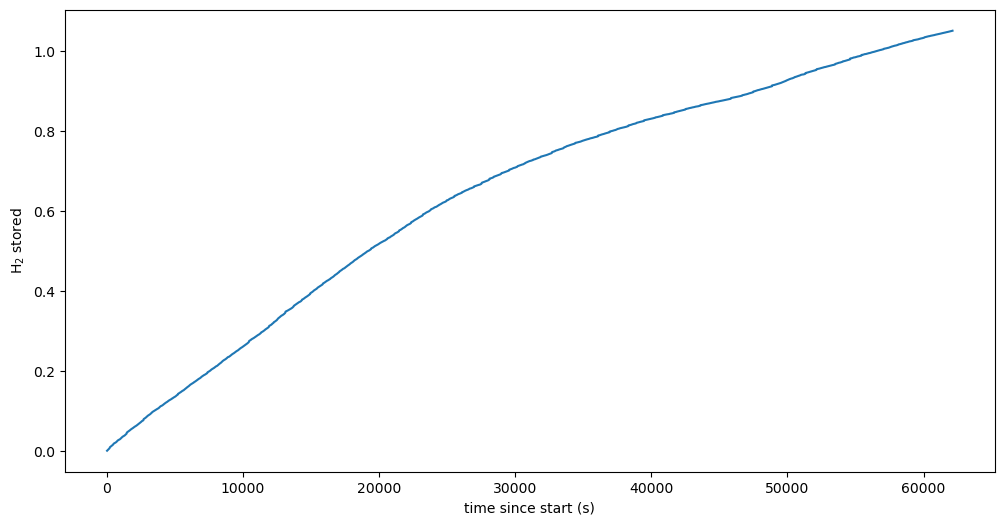

In [29]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(df_resampled.time_since_start, df_resampled.h2_stored)

ax.set_xlabel('time since start (s)')
ax.set_ylabel('H$_2$ stored')

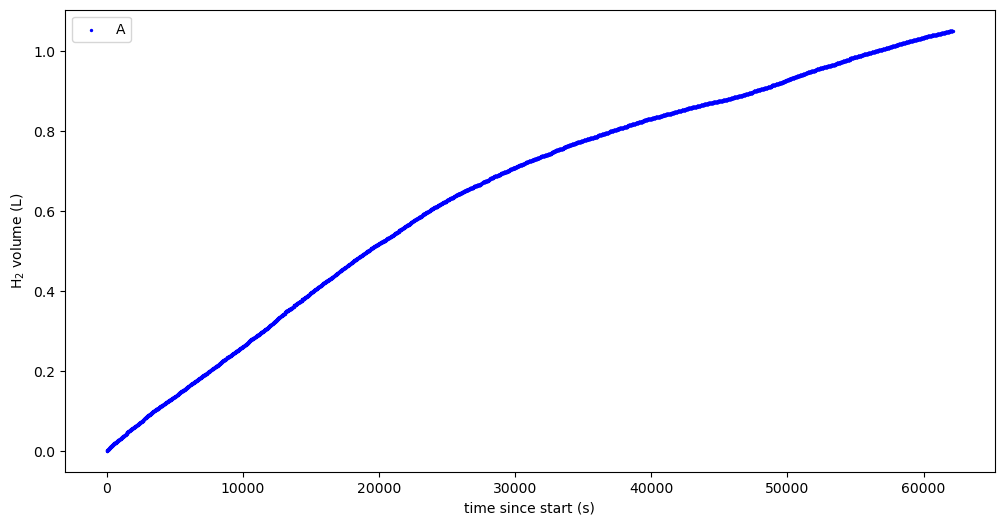

In [30]:
# Create the plot
fig, ax = plt.subplots(1, figsize=(12, 6))

# Define colors for different experiment types
color_map = {
    'A': 'blue',
    'D': 'red',
    'default': 'black'
}

# Iterate through unique experiment types and plot with different colors
for exp_type in df_resampled['experiment_type'].unique():
    exp_type_data = df_resampled[df_resampled['experiment_type'] == exp_type]
    color = color_map.get(exp_type, color_map['default'])
    ax.scatter(exp_type_data.time_since_start, exp_type_data.h2_stored, s=2, label=f'{exp_type}', color=color)

# Set labels
ax.set_xlabel('time since start (s)')
ax.set_ylabel('H$_2$ volume (L)')

# Add legend
ax.legend()

# Show the plot
plt.show()

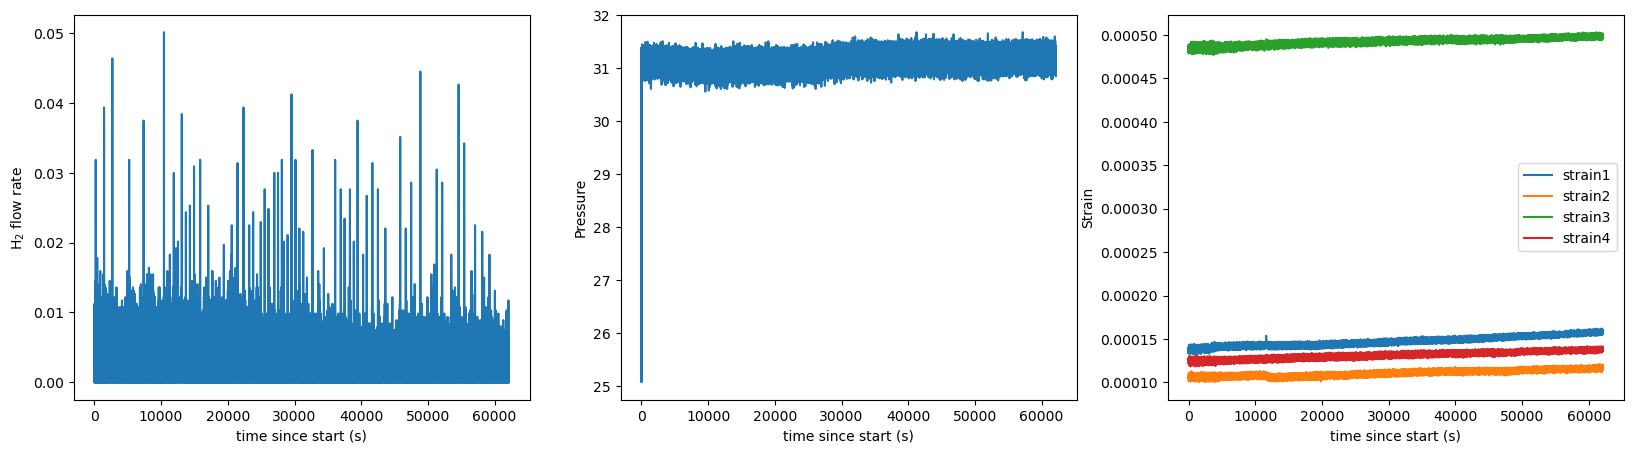

In [31]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))
for ax in axes:
    ax.set_xlabel('time since start (s)')
    # ax.set_xticklabels((df.time_since_start/60).round(1))

axes[0].plot(df.time_since_start, df.h2_flow_rate)
axes[0].set_ylabel('H$_2$ flow rate')
mean_flow = df.h2_flow_rate.mean()
# axes[0].set_ylim(mean_flow*0.95, mean_flow*1.05)

axes[1].plot(df.time_since_start, df.pressure)
axes[1].set_ylabel('Pressure')

strain_cols = [f'strain{i+1}' for i in range(4)]
strain_data = df.set_index('time_since_start')[strain_cols].dropna()
axes[2].plot(strain_data)
axes[2].set_ylabel('Strain')
axes[2].legend(strain_cols)

In [32]:
#summary_df.to_csv("A1-D61_summary_stats.csv")